In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization

from read_dataset import read_ceps_with_train_test
import numpy as np
from create_data_ceps import createCepsSS
from read_saved_models import loadCepsStanderdScaler

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train, X_test, y_train, y_test = read_ceps_with_train_test()

In [3]:
def getStanderizedData(data):
    data_shape = data.shape
    n = data_shape[0]
    reshaped_data = data.reshape(n, -1)
    saved_ss = loadCepsStanderdScaler()
    trasformed_data = saved_ss.transform(reshaped_data)
    ret_data = trasformed_data.reshape(data_shape)
    return ret_data

In [4]:
X_ss_train = getStanderizedData(X_train)
X_ss_test = getStanderizedData(X_test)

In [5]:
model = Sequential()

# this layerf from https://keras.io/getting-started/sequntial-model-guide/
# Dense(64) is fully-connected layer with 64 hidden units
model.add(Dense(100, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.01, decay=1e-7)

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])
epoch = 20

In [6]:
result = model.fit(X_ss_train, y_train, epochs=epoch, batch_size=100,  validation_split=0.2)

Train on 480 samples, validate on 120 samples
Epoch 1/20
480/480 [==============================] - 5s - loss: 2.7136 - acc: 0.1396 - val_loss: 2.1551 - val_acc: 0.2333
Epoch 2/20
480/480 [==============================] - 0s - loss: 2.2320 - acc: 0.2250 - val_loss: 2.0985 - val_acc: 0.2917
Epoch 3/20
480/480 [==============================] - 0s - loss: 2.0205 - acc: 0.3042 - val_loss: 2.1165 - val_acc: 0.3000
Epoch 4/20
480/480 [==============================] - 0s - loss: 1.9206 - acc: 0.3396 - val_loss: 2.0147 - val_acc: 0.2833
Epoch 5/20
480/480 [==============================] - 0s - loss: 1.8219 - acc: 0.3604 - val_loss: 1.8974 - val_acc: 0.2917
Epoch 6/20
480/480 [==============================] - 0s - loss: 1.7000 - acc: 0.4083 - val_loss: 1.8224 - val_acc: 0.2917
Epoch 7/20
480/480 [==============================] - 0s - loss: 1.6962 - acc: 0.3771 - val_loss: 1.7760 - val_acc: 0.3000
Epoch 8/20
480/480 [==============================] - 0s - loss: 1.6207 - acc: 0.4167 - val_l

100/400 [======>.......................] - ETA: 0s
['loss', 'acc']
[1.3474427759647369, 0.51999998837709427]


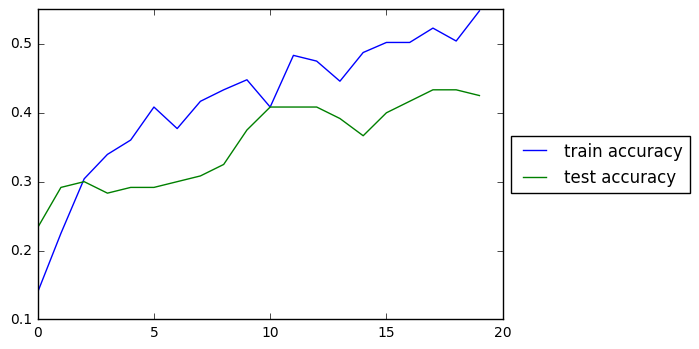

In [7]:
x = range(epoch)
plt.plot(x, result.history['acc'], label='train accuracy')
plt.plot(x, result.history['val_acc'], label='test accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

score = model.evaluate(X_ss_test, y_test, batch_size=100)
print("")
print(model.metrics_names)
print(score)

In [8]:
model_filepath = "./savedModels/ceps_standerized_dense_model.h5"
model.save(model_filepath)

In [9]:
file_path = "../data/songData/genres/disco/disco.00006.ceps.npy"
ceps = np.load(file_path)

t_ceps = ceps.transpose()
t_num_ceps = len(t_ceps)
t_ceps_mean = np.mean(t_ceps[int(t_num_ceps / 10):int(t_num_ceps * 9 / 10)], axis=0)
predict_data = np.array([t_ceps_mean])
predict_data = getStanderizedData(predict_data)

In [10]:
predict_result = model.predict(predict_data)
print(predict_result)
print(np.argmax(predict_result))

[[ 0.10700841  0.00580404  0.07550108  0.16170007  0.01823782  0.00376182
   0.26405472  0.00872526  0.0131992   0.34200758]]
9
